Data augmentation (vid01  Jan 2017 Oackland - WhiteLaneTrack clockwise)
# folder
dataWhiteTrack/vid01

In [41]:
import cv2
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy import stats
import glob
%matplotlib inline

In [10]:
vid1_dir = 'data/oakland170418/'


log_vid1 = []

with open(vid1_dir+'1492543329.txt', 'r') as csvfile:
    data_vid1 = csv.reader(csvfile, delimiter=',')
    for row in data_vid1:
        log_vid1.append(row)

log_vid1 = np.array(log_vid1)

print('Example of log file data: img_fname {} | steering {} | throttle {}'.format(*log_vid1[0]))

print('Dataset size (vid1): {}'.format(len(log_vid1)))

Example of log file data: img_fname {"c":1 | steering s:90 | throttle time:"1492543379299"
Dataset size (vid1): 5810


In [44]:
def make_imgName(id):
    '''
    generate image filename from index in 1st column of summary txt file
    '''
    idx = '{:05d}'.format(id)
    img_name = 'img' + str(idx)  + '.jpg'
    return img_name


'''
row {"c":1,"s":94,"time":"1489255712171","t":99,"device_id":"B827EB4879D6"}
'''
#get summary txt file
summary_fileList = glob.glob(vid1_dir+'/*.txt')
if len(summary_fileList) == 1:
    summary_txt = summary_fileList[0]
    print(summary_txt)
    with open(summary_txt, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',')
        log = []
        for row in data:
            img_idx, steering, throttle = row[0][5::], row[1][2::], row[3][2::]
            img_fname = vid1_dir +'/'+ make_imgName( int(img_idx) )
            log.append([img_fname, steering, throttle])
            print([img_fname, steering, throttle])
    np.save('log.npy', log)

else:
    print('Unable to find the summary file {}'.format('*'+self.folder_imgs+'*.txt'))

data/oakland170418/1492543329.txt
['data/oakland170418//img00001.jpg', '90', '93']
['data/oakland170418//img00002.jpg', '90', '93']
['data/oakland170418//img00003.jpg', '90', '93']
['data/oakland170418//img00004.jpg', '90', '92']
['data/oakland170418//img00005.jpg', '90', '92']
['data/oakland170418//img00006.jpg', '90', '93']
['data/oakland170418//img00007.jpg', '90', '93']
['data/oakland170418//img00008.jpg', '90', '93']
['data/oakland170418//img00009.jpg', '90', '92']
['data/oakland170418//img00010.jpg', '90', '92']
['data/oakland170418//img00011.jpg', '90', '92']
['data/oakland170418//img00012.jpg', '90', '94']
['data/oakland170418//img00013.jpg', '90', '94']
['data/oakland170418//img00014.jpg', '90', '94']
['data/oakland170418//img00015.jpg', '90', '94']
['data/oakland170418//img00016.jpg', '90', '94']
['data/oakland170418//img00017.jpg', '90', '94']
['data/oakland170418//img00018.jpg', '90', '94']
['data/oakland170418//img00019.jpg', '90', '94']
['data/oakland170418//img00020.jpg'

(240, 320)


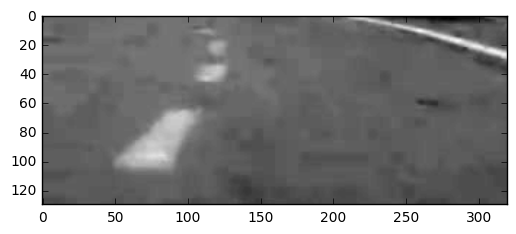

In [52]:
fname = 'img03086.jpg'
img = cv2.imread(vid1_dir+fname)
img = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)[:,:,0]
img_crop = img[90:-20,:]
#img_crop = cv2.resize(img_crop, (128,128))
print(img.shape)
plt.imshow(img_crop, cmap='gray')
#ycrop_range = [140, -20]

# Statistics Steering angle

In [8]:
label_st = log_vid1[:,1].astype('float')

def count(data):
    
    #Get frequency of unique values in data
    #data: list or array
    #output an array: [[value, count],...]
    
    unique = np.unique(data)
    hist_data = []
    for item in unique:
        hist_data.append([item, np.sum(data == item)])
    return np.array(hist_data)

freq = count(label_st)
plt.bar(freq[:,0], freq[:,1])
print('Max Steering Value {} | Min: {}'.format(np.max(label_st), np.min(label_st)))

stats.describe(freq)

ValueError: could not convert string to float: 's:90'

Max Steering Value 999.0 | Min: 91.0


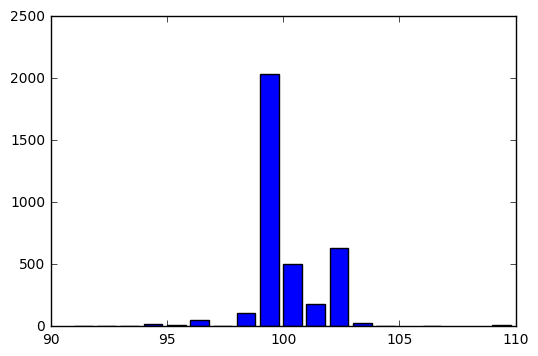

In [107]:
label_th = log_vid1[:,2].astype('float')

def count(data):
    
    #Get frequency of unique values in data
    #data: list or array
    #output an array: [[value, count],...]
    
    unique = np.unique(data)
    hist_data = []
    for item in unique:
        hist_data.append([item, np.sum(data == item)])
    return np.array(hist_data)

freq = count(label_th)
plt.bar(freq[:,0], freq[:,1])
plt.xlim([90,110])

print('Max Steering Value {} | Min: {}'.format(np.max(label_th), np.min(label_th)))


# show random images

error: /home/jmlb/Downloads/OpenCV-tmp/opencv-3/modules/imgproc/src/color.cpp:9716: error: (-215) scn == 3 || scn == 4 in function cvtColor


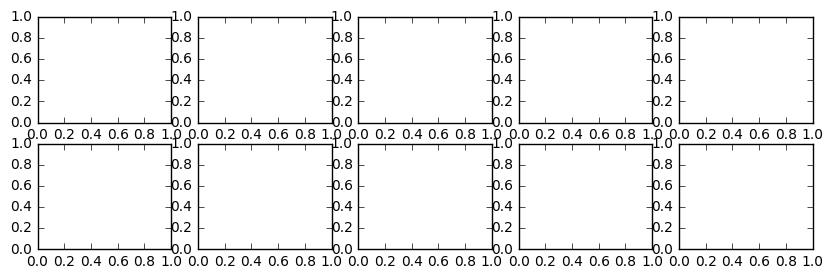

In [7]:
idx_list = np.random.randint(0, len(log_vid1), size=10)

col, row = [0, 0]
_, ax = plt.subplots(2, 5, figsize=(10, 3))
for i, idx in enumerate(idx_list):
    img_adress = vid1_dir+log_vid1[idx, 0]
    img = cv2.imread(img_adress)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[row, col].imshow(img)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    if col == 4:
        col, row = 0, row+1
    else:
        col = col + 1
plt.show()

In [ ]:
# Convert to YCrCb

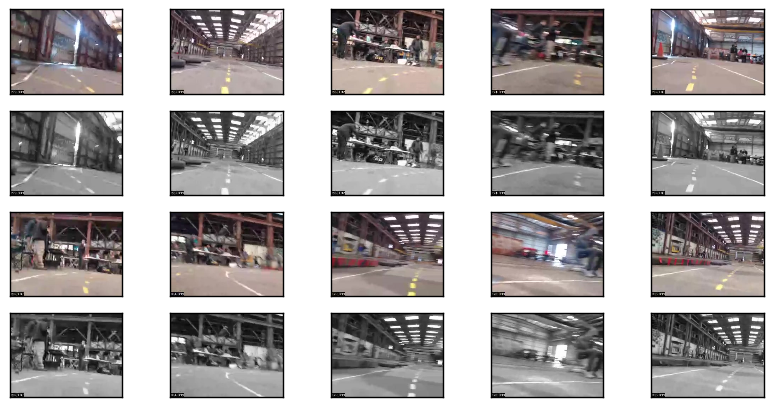

Pixel intensity Max: 255 | Min 0


In [48]:
col, row = [0, 0]
_, ax = plt.subplots(4, 5, figsize=(10, 5))
for i, idx in enumerate(idx_list):
    img_adress = vid1_dir+log_vid1[idx, 0]
    img = cv2.imread(img_adress)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[row, col].imshow(img_rgb)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)[:,:,0]
    ax[row+1, col].imshow(img_gray, cmap='gray')
    ax[row+1, col].set_xticks([])
    ax[row+1, col].set_yticks([])
    
    if col == 4:
        col, row = 0, row+2
    else:
        col = col + 1
plt.show()

print('Pixel intensity Max: {} | Min {}'.format(np.max(img), np.min(img)))

# Apply crop as in config.py
    img_yaxis_start = 140
    img_yaxis_end = 227
    img_height = img_yaxis_end - img_yaxis_start + 1
    # image x-axis cropping
    img_xaxis_start = 0
    img_xaxis_end = 319
    img_width = img_xaxis_end - img_yaxis_start + 1
    # image resampling dimensions
    img_resample_dim = (180,180)
    
    
img_yaxis_start = **150**
img_yaxis_end = 227

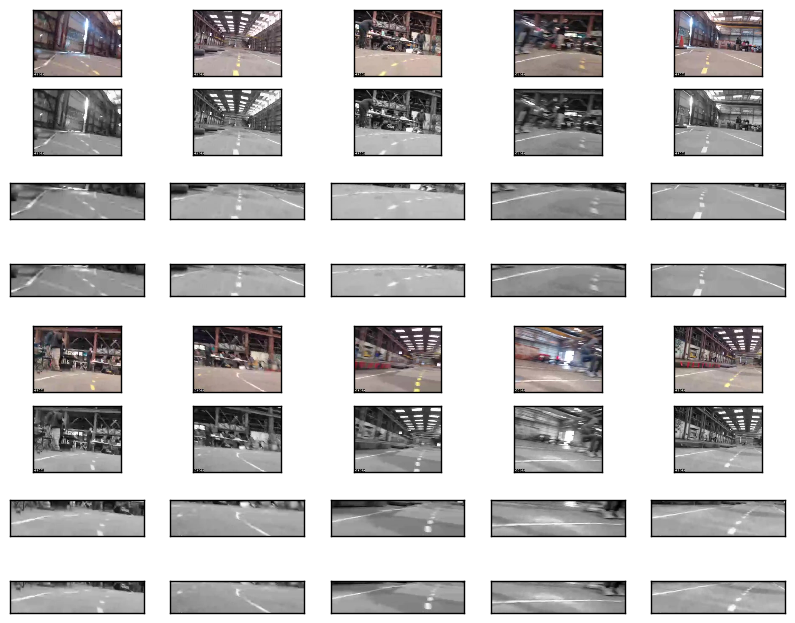

In [49]:
col, row = [0, 0]
_, ax = plt.subplots(8, 5, figsize=(10, 8))
for i, idx in enumerate(idx_list):
    img_adress = vid1_dir+log_vid1[idx, 0]
    img = cv2.imread(img_adress)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[row, col].imshow(img_rgb)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)[:,:,0]
    ax[row+1, col].imshow(img_gray, cmap='gray')
    ax[row+1, col].set_xticks([])
    ax[row+1, col].set_yticks([])
    
    img_gray_crop = img_gray[140:227, :]
    ax[row+2, col].imshow(img_gray_crop, cmap='gray')
    ax[row+2, col].set_xticks([])
    ax[row+2, col].set_yticks([])
    
    img_gray_crop2 = img_gray[150:227, :]
    ax[row+3, col].imshow(img_gray_crop2, cmap='gray')
    ax[row+3, col].set_xticks([])
    ax[row+3, col].set_yticks([])
    if col == 4:
        col, row = 0, row+4
    else:
        col = col + 1
plt.show()

# Data augmentation schemes

## Horizontal flip

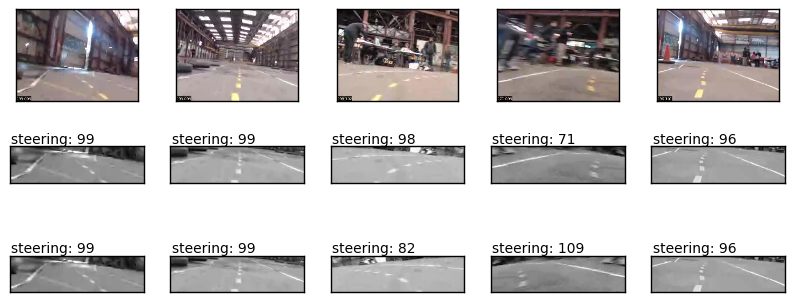

In [47]:
def image_hflip(img, label):
    '''
    Randomly flip image along horizontal axis: 1/2 chance that the image will be flipped
    img: original image in array type
    label: steering angle value of the original image
    '''
    choice = np.random.choice([0,1])
    if choice == 1:
            img = cv2.flip(img, 1)
            delta_label = label - 90
            label = 90 - delta_label 
    
    return (img, label)


#Try horizontal flip on 5 images
col, row = [0, 0]
_, ax = plt.subplots(3, 5, figsize=(10, 4))

for i, idx in enumerate(idx_list[0:5]):
    img_adress = vid1_dir+log_vid1[idx, 0]
    img = cv2.imread(img_adress)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[row, col].imshow(img_rgb)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)[:,:,0]
    img_gray = img_gray[140:227, :]
    ax[row+1, col].imshow(img_gray, cmap='gray')
    steering = log_vid1[idx, 1]
    title_ = 'steering: {}'.format(steering)
    ax[row+1, col].text(3, -8, title_, fontsize=10, color='black')
    ax[row+1, col].set_xticks([])
    ax[row+1, col].set_yticks([])
    
    steering = int( log_vid1[idx, 1] )
    img_gray_flip, steering = image_hflip(img_gray, steering)
    title_ = 'steering: {}'.format(steering)
    ax[row+2, col].text(3, -8, title_, fontsize=10, color='black')
    ax[row+2, col].imshow(img_gray_flip, cmap='gray')
    ax[row+2, col].set_xticks([])
    ax[row+2, col].set_yticks([])
    if col == 4:
        col, row = 0, row+3
    else:
        col = col + 1
plt.show()

In [ ]:
## Lighting

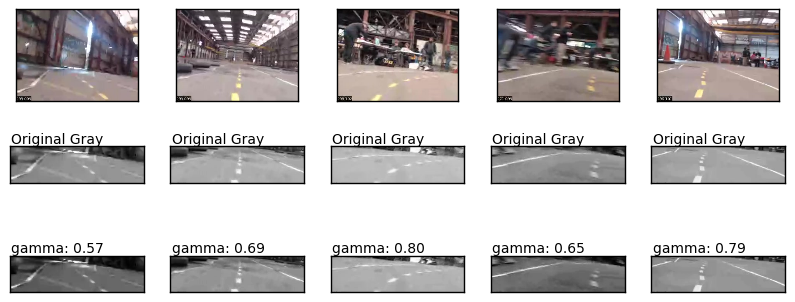

In [74]:
def gamma_transform(img, label):
    '''
    Adjust the brightness of the image
    img: original image in array type
    label: steering angle value of the original image
    '''
    gamma = np.random.uniform(low=0.2, high=1.0, size=None)
    inv_gamma = 1.0/gamma
    img = 255 *(img/255.)**(inv_gamma)
    
    return (img, gamma)



#Try vertical flip on 5 images
col, row = [0, 0]
_, ax = plt.subplots(3, 5, figsize=(10, 4))

for i, idx in enumerate(idx_list[0:5]):
    img_adress = vid1_dir+log_vid1[idx, 0]
    img = cv2.imread(img_adress)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[row, col].imshow(img_rgb)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    
    img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    img_gray = img_ycrcb[:,:,0]
    img_gray = img_gray[140:227, :]
    ax[row+1, col].imshow(img_gray, cmap='gray')
    title_ = 'Original Gray'
    ax[row+1, col].text(3, -8, title_, fontsize=10, color='black')
    ax[row+1, col].set_xticks([])
    ax[row+1, col].set_yticks([])
    
    img_gamma, gamma = gamma_transform(img_ycrcb, None)
    img_gray = img_gamma[:,:,0]
    img_gray = img_gray[140:227, :]
    ax[row+2, col].imshow(img_gray, cmap='gray')
    title_ = 'gamma: {:.2f}'.format(gamma)
    ax[row+2, col].text(3, -8, title_, fontsize=10, color='black')
    ax[row+2, col].set_xticks([])
    ax[row+2, col].set_yticks([])
    col = col + 1
plt.show()

In [90]:
a =[90, 89, 88, 12, 110, 105, 150]
b= np.clip(a, 80, 110)
print(b)

[ 90  89  88  80 110 105 110]
